Text to ML

## Import libraries
To install libraries in Python, you can use a package manager like pip, which comes pre-installed with most Python distributions.



In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
eeg_data = pd.read_csv("/content/drive/MyDrive/Converted_data.csv")
display(eeg_data.head())


**Shuffle** the data

In [ ]:
import pandas as pd
import numpy as np

# Example DataFrame
data = eeg_data
eeg_data = pd.DataFrame(data)

# Shuffle the DataFrame by 'file_num'
# Step 1: Get unique file_nums and shuffle them
unique_file_nums = eeg_data['file_num'].unique()
np.random.shuffle(unique_file_nums)

# Step 2: Reorder the DataFrame based on the shuffled file_nums
shuffled_data = pd.concat([eeg_data[eeg_data['file_num'] == file_num] for file_num in unique_file_nums])

# Reset the index (optional)
shuffled_data.reset_index(drop=True, inplace=True)

print(shuffled_data)

        file_num  sample_num  subje0t_identifier    AF1    AF2     AF7    AF8  \
0            274           0                   0  0.651  0.926   2.279  4.517   
1            274           1                   0  0.651 -0.051   2.279  3.540   
2            274           2                   0 -0.326 -1.516   2.279  0.610   
3            274           3                   0 -0.814 -2.981   2.279 -2.319   
4            274           4                   0 -0.326 -2.492   2.767 -3.296   
...          ...         ...                 ...    ...    ...     ...    ...   
122875        70         251                   1 -2.838 -3.581  -2.248 -0.916   
122876        70         252                   1 -3.815 -4.069  -5.178  0.061   
122877        70         253                   1 -4.303 -4.557  -8.108  0.549   
122878        70         254                   1 -5.280 -5.046 -11.037 -0.916   
122879        70         255                   1 -5.768 -6.022 -12.502 -3.845   

          AFZ     C1     C2

**Hot Cooding**




In [ ]:
import numpy as np

def custom_encode(value, num_categories=7):
    if value < 1 or value > num_categories:
        raise ValueError(f"Value must be between 1 and {num_categories}")

    encoding = [0] * num_categories
    encoding[value - 1] = 1
    return encoding

# Example usage
original_data = [1, 2, 3, 4, 5, 6, 7]
encoded_data = [custom_encode(value) for value in original_data]

print("Original data:", original_data)
print("\nEncoded data:")
for original, encoded in zip(original_data, encoded_data):
    print(f"{original} -> {encoded}")

# Specific example for 7
print("\nSpecific example for 7:")
print(f"7 -> {custom_encode(7)}")


Original data: [1, 2, 3, 4, 5, 6, 7]

Encoded data:
1 -> [1, 0, 0, 0, 0, 0, 0]
2 -> [0, 1, 0, 0, 0, 0, 0]
3 -> [0, 0, 1, 0, 0, 0, 0]
4 -> [0, 0, 0, 1, 0, 0, 0]
5 -> [0, 0, 0, 0, 1, 0, 0]
6 -> [0, 0, 0, 0, 0, 1, 0]
7 -> [0, 0, 0, 0, 0, 0, 1]

Specific example for 7:
7 -> [0, 0, 0, 0, 0, 0, 1]


In [ ]:
from google.colab import files

# Convert the DataFrame to CSV
shuffled_data.to_csv('shuffled_data_1.csv', index=False)

# Download the file
files.download('shuffled_data_1.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Only EEG

In [ ]:
x = shuffled_data.iloc[:, 3:]
display(x.head())
column_names = x.columns.tolist()
y = shuffled_data["subje0t_identifier"]
display(y.head())

,AF1,AF2,AF7,AF8,AFZ,C1,C2,C3,C4,C5,...,PO8,POZ,PZ,T7,T8,TP7,TP8,X,Y,nd
0,0.651,0.926,2.279,4.517,0.977,2.584,1.099,-0.702,0.570,0.509,...,-1.760,6.846,5.686,2.228,0.112,4.781,0.854,8.148,8.952,3.662
1,0.651,-0.051,2.279,3.540,0.488,-0.346,-0.366,-0.702,-0.895,0.020,...,-2.736,6.846,5.686,2.228,-5.259,4.781,-1.587,9.613,8.464,3.174
2,-0.326,-1.516,2.279,0.610,-0.488,1.119,0.122,-0.702,-1.872,0.020,...,-4.690,5.870,5.198,1.740,-7.701,4.293,-3.540,9.125,6.510,1.709
3,-0.814,-2.981,2.279,-2.319,-1.465,-0.346,-0.854,-0.214,-1.872,-0.468,...,-11.037,4.405,4.222,0.763,-6.724,3.316,-4.028,6.683,4.557,0.732
4,-0.326,-2.492,2.767,-3.296,-0.977,-1.322,0.122,0.275,-0.895,-0.468,...,-13.479,2.940,3.245,0.275,-4.283,2.340,-3.540,4.730,3.092,1.709


,subje0t_identifier
0,0
1,0
2,0
3,0
4,0


## Libraries for Visualisation

The simplest libraries for data visualization are Matplotlib and Seaborn. These general-purpose Python libraries are also frequently used for creating custom visualizations of EEG data due to their flexibility and ease of use.   
For the most part, we will use the Matplotlib library, its main advantage over Seaborn is its ability to work in real-time.

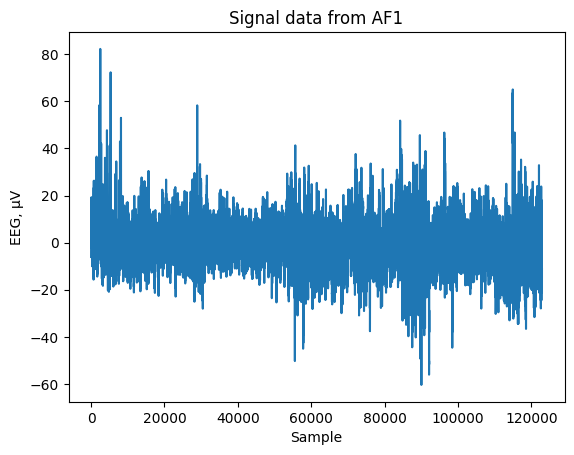

In [ ]:
# select the data from the first channel for demo
channel = "AF1"
channel_data = eeg_data[channel]

# plot the EEG data
plt.plot(channel_data)
plt.title("Signal data from "+channel)
plt.ylabel('EEG, µV')
plt.xlabel('Sample')
plt.show()

**Convert To Alpha**  

Theta Band (3–7 Hz): Increased theta power is often observed in alcoholics compared to controls. It has been suggested as a potential marker for alcoholism, especially in resting-state EEG.

Alpha Band (8–13 Hz): Alcohol consumption can lead to changes in alpha activity, such as increased slow alpha power and decreased fast alpha frequency. These changes are more pronounced in individuals at risk of alcoholism.

Beta Band (14–30 Hz): Beta rhythms show significant alterations with alcohol use, including increased beta power. This band is frequently associated with chronic alcohol consumption.

Gamma Band (30–40 Hz): The gamma band has been identified as highly significant for detecting alcoholism. Studies show a strong correlation between gamma power and alcoholic EEG features, making it a promising rhythm for analysi

(480, 64)
alpha_df (480, 65)


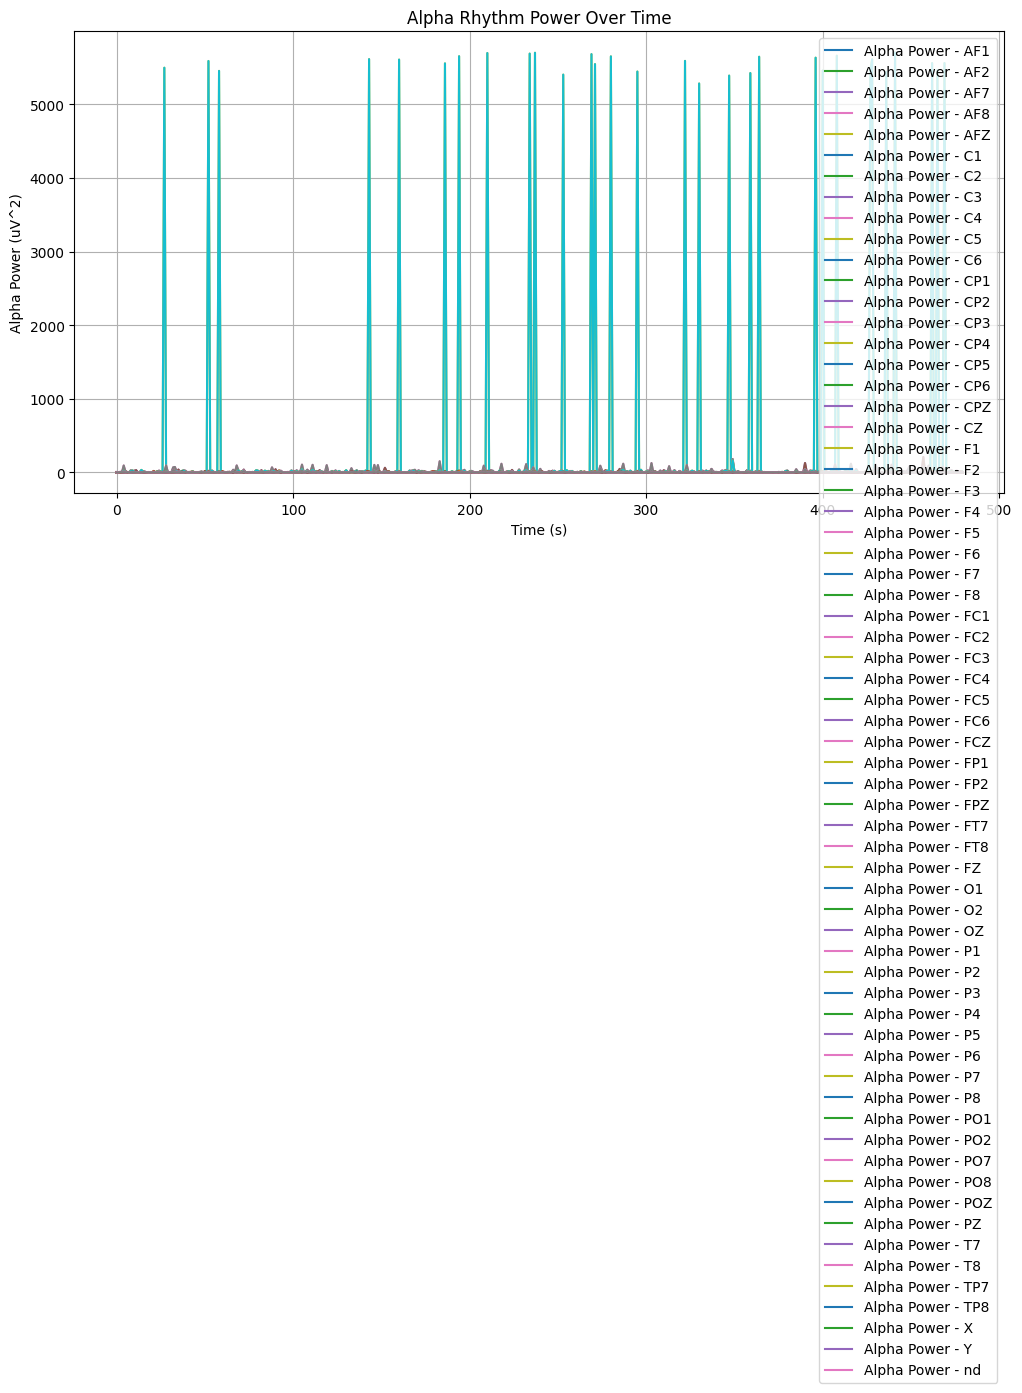

In [ ]:
#1 doneaload
#2 use welch script from the article

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.integrate import simpson

# Load the CSV file
#file_path = 'C:/Users/dataset_from_PiEEG.csv'  # Update with your actual file path
#data = x #pd.read_csv(file_path)
# Ensure only numeric columns are processed
data = x.select_dtypes(include=[np.number])

# Sampling frequency (Hz)
fs = 256
window_size = 256  # 1-second windows (256 samples)
low_alpha, high_alpha = 30, 100  # Alpha band range (Hz)
# Store alpha power for each channel over time
alpha_powers = {col: [] for col in data.columns}
timestamps = []  # Store timestamps for each segment
# Iterate through 250-sample windows

for start in range(0, len(data), window_size):
    end = start + window_size
    #print (start,end)
    if end > len(data):  # Ensure we don't exceed the dataset
        break
    timestamps.append(start / fs)  # Convert sample index to time in seconds
    for col in data.columns:
        segment = data[col][start:end]
        #print (start,end)
        #print (len(segment))
        #import sys
        #sys.exit()
        # Compute Welch's PSD
        freqs, psd = signal.welch(segment, fs, nperseg=window_size)
        # Find alpha range in frequencies
        idx_alpha = np.logical_and(freqs >= low_alpha, freqs <= high_alpha)
        # Compute absolute alpha power (area under the curve)
        freq_res = freqs[1] - freqs[0]  # Frequency resolution
        alpha_power = simpson(psd[idx_alpha], dx=freq_res)
        alpha_powers[col].append(alpha_power)
# Convert results to DataFrame
alpha_df = pd.DataFrame(alpha_powers)
print (alpha_df.shape)
alpha_df.insert(0, 'Time (s)', timestamps)  # Insert time column at the beginning
# Save to Excel
print ("alpha_df", alpha_df.shape)
#alpha_df.to_csv('alpha_df.csv', index=False)
#from google.colab import files
#files.download('alpha_df.csv')
#print(f'Alpha power results saved to {excel_filename}')
# Plot alpha power trends for all channels
plt.figure(figsize=(12, 6))
for col in alpha_df.columns[1:]:  # Skip 'Time (s)'
    plt.plot(alpha_df['Time (s)'], alpha_df[col], label=f'Alpha Power - {col}')
    plt.plot(alpha_df[col])

plt.xlabel('Time (s)')
plt.ylabel('Alpha Power (uV^2)')
plt.title('Alpha Rhythm Power Over Time')
plt.legend()
plt.grid()
plt.show()

Convert Y data

In [ ]:
import numpy as np
import pandas as pd

window_size = 256
data = y
y_alpha = []

for start in range(0, len(data), window_size):
  y_alpha.append(data[start])

print (pd.DataFrame(y_alpha))

     0
0    0
1    0
2    0
3    1
4    1
..  ..
475  0
476  1
477  0
478  1
479  1

[480 rows x 1 columns]



**Dimensionality Reduction**

In [ ]:
#copy from the course

**Visualisation **

Text(0.5, 1.0, "Welch's periodogram")

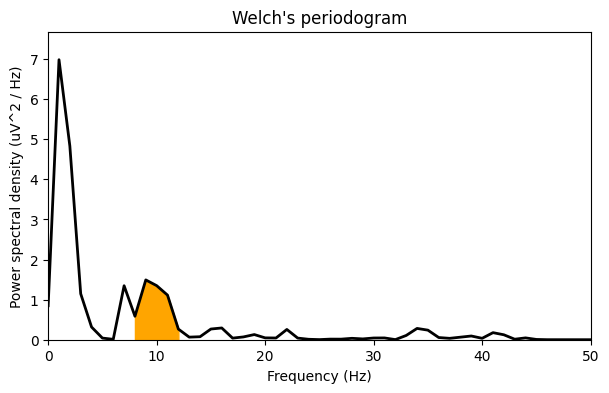

In [ ]:
# Define delta lower and upper limits
low, high = 8, 12

# Find intersecting values in frequency vector
idx_delta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_delta, color='orange')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 50])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")

**normalize Data**

In [ ]:
from sklearn import preprocessing
column_names_alpha = alpha_df.columns
normalized_x_alpha = preprocessing.normalize(alpha_df) #
standardized_x_alpha = preprocessing.scale(alpha_df)   # #print (standardized_x)

normalized_x_alpha = pd.DataFrame(normalized_x_alpha, columns=column_names_alpha)
standardized_x_alpha = pd.DataFrame(standardized_x_alpha, columns=column_names_alpha)

print (standardized_x_alpha)

     Time (s)       AF1       AF2       AF7       AF8       AFZ        C1  \
0   -1.728446  0.117906 -0.054277  0.154828 -0.303529  0.151805  1.217226   
1   -1.721229 -0.197464 -0.587562 -0.055049 -0.409560 -0.529878 -0.881992   
2   -1.714012 -0.161440 -0.564284  0.488099 -0.299310 -0.652308 -0.911510   
3   -1.706795 -0.570766 -0.215096 -0.098734 -0.149237 -0.405532 -0.884881   
4   -1.699579 -0.028024 -0.477792  3.446729 -0.423896 -0.238631  0.834161   
..        ...       ...       ...       ...       ...       ...       ...   
475  1.699579 -0.405819 -0.397384  0.106439 -0.446750 -0.355881 -0.278789   
476  1.706795  0.466393  0.306727 -0.591383 -0.467106  0.631862 -0.861080   
477  1.714012 -0.327845 -0.437803 -0.398673  0.005171 -0.561690 -0.799877   
478  1.721229 -0.566592 -0.523755 -0.737970 -0.384774 -0.479741 -0.898250   
479  1.728446 -0.711642 -0.472091 -0.579854 -0.509488 -0.625706 -0.118462   

           C2        C3        C4  ...       PO8       POZ        PZ  \
0  

**Hyperparameters**

Examples of hyperparameters include:
Train-test split ratio
Learning rate in optimization algorithms
Choice of optimization algorithm (e.g., gradient descent, stochastic gradient descent, or Adam optimizer)
Choice of activation function in a neural network layer (e.g., Sigmoid, ReLU, Tanh)
The choice of cost or loss function the model will use
Number of hidden layers in a neural network
Number of activation units in each layer
The drop-out rate in neural networks
Number of iterations (epochs) in training a neural network
Number of clusters in a clustering task
Kernel or filter size in convolutional layers

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(normalized_x[:1000], y[:1000], test_size=0.2, random_state=42)

numeric_features = normalized_x.select_dtypes(include=['int64', 'float64']).columns
categorical_features = normalized_x.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])
#Define the hyperparameter space:

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10]
}

#Perform grid search with cross-validation:
from sklearn.model_selection import GridSearchCV

y_train = pd.DataFrame(y_train)
y_train = y_train.iloc[:, 0]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

print (X_train.shape)
print (y_train.shape)
print (type(X_train))
print (type(y_train))
print("columns", X_train.columns)  # Check available columns


#X_train = X_train.reset_index(drop=True)
#y_train = y_train.reset_index(drop=True)

grid_search.fit(X_train, y_train)

#Get the best model and evaluate:
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Test accuracy: {accuracy}")


NameError: name 'normalized_x' is not defined

ExtraTreeClassifier

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing

# Assuming eeg_data_final and status_y are already defined


# Split the data
x_train, x_test, y_train, y_test = train_test_split(normalized_x[:1000], y[:1000], test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the base model
base_model = ExtraTreesClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train[:100], y_train[:100])

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Print the accuracy score
print("Test set accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.97
Test set accuracy: 0.97


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
292 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

SVC - Support Vector Classification

In [ ]:
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# fit a SVM model to the data
model = SVC()

x_train, x_test, y_train, y_test = train_test_split(normalized_x_alpha, y_alpha, test_size=0.7, random_state=42)
model.fit(x_train, y_train)

expected = y_test
predicted = model.predict(x_test)
print(accuracy_score(y_test, predicted))

0.6339285714285714


Logistic Regression

In [ ]:
from sklearn import metrics
#from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# fit a SVM model to the data
model = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(normalized_x_alpha, y_alpha, test_size=0.7, random_state=42)
model.fit(x_train, y_train)

expected = y_test
predicted = model.predict(x_test)
print(accuracy_score(y_test, predicted))

0.6428571428571429


**Logistic Regression with Random Search**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import uniform, loguniform

# Split the data
x_train, x_test, y_train, y_test = train_test_split(normalized_x_alpha, y_alpha, test_size=0.7, random_state=42)

# Define the parameter space
param_distributions = {
    'C': loguniform(1e-5, 100),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}

# Create a logistic regression model
model = LogisticRegression()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    n_jobs=1,
    random_state=42,
    verbose=1
)

# Perform random search
random_search.fit(x_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions on the test set
predicted = best_model.predict(x_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, predicted)
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.4f}")
print(f"Test accuracy: {accuracy:.4f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ di

Best parameters: {'C': np.float64(76.3161056652986), 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.9448
Test accuracy: 0.9226


**Logistic Regression with Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Optimization algorithms
}

# Create the base model
model = LogisticRegression(random_state=42)

# Create the grid search object
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=1  # Use all available cores
)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(normalized_x_alpha, y_alpha, test_size=0.7, random_state=42)

# Perform the grid search
grid_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
predicted = best_model.predict(x_test)

# Print the accuracy score
print("Accuracy Score:", accuracy_score(y_test, predicted))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means 

Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.9586206896551724
Accuracy Score: 0.9285714285714286


**cross-validation**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming x and y are already defined
model = LogisticRegression(max_iter=1000)

# Perform cross-validation
cv_scores = cross_val_score(model, normalized_x_alpha, y_alpha, cv=5)  # 5-fold cross-validation

# Print cross-validation results
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))
print("Standard deviation of CV scores:", np.std(cv_scores))

# If you still want to do a train-test split for final evaluation:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model.fit(x_train, y_train)

expected = y_test
predicted = model.predict(x_test)

print("Test set accuracy:", accuracy_score(y_test, predicted))


Cross-validation scores: [0.61458333 0.69791667 0.66666667 0.64583333 0.61458333]
Mean CV score: 0.6479166666666667
Standard deviation of CV scores: 0.03186887195995487
Test set accuracy: 0.6373697916666666


**k-Nearest Neighbors (KNN) with Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the parameter grid for K-Nearest Neighbors
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Create the base model
model = KNeighborsClassifier()

# Create the grid search object
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=1  # Use all available cores
)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(normalized_x_alpha, y_alpha, test_size=0.7, random_state=42)

# Perform the grid search
grid_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
predicted = best_model.predict(x_test)

# Print the accuracy score
print("Accuracy Score:", accuracy_score(y_test, predicted))


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best Cross-Validation Score: 0.8748768472906404
Accuracy Score: 0.9077380952380952


**Support Vector Machines (SVM)**

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the parameter grid for Support Vector Machine (SVM)
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Create the base model
model = SVC(random_state=2)

# Create the grid search object
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=1  # Use all available cores
)

# Split the data
#normalized_x_short = normalized_x.head(1000)
#y_short = y.head(1000)
x_train, x_test, y_train, y_test = train_test_split(normalized_x_alpha, y_alpha, test_size=0.7, random_state=2)
# Perform the grid search
grid_search.fit(x_train, y_train)
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
predicted = best_model.predict(x_test)

# Print the accuracy score
print("Accuracy Score:", accuracy_score(y_test, predicted))


Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.8753694581280789
Accuracy Score: 0.8571428571428571


Random Forests with Grid Search


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [None, 10, 20, 30],      # Max depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum number of samples to split an internal node
    'min_samples_leaf': [1, 2, 4]         # Minimum number of samples required at a leaf node
}

# Create the base model
model = RandomForestClassifier(random_state=42)

# Create the grid search object
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=1  # Use all available cores
)

# Split the data
# normalized_x_short = normalized_x.head(1000)

#y_short = y.head(1000)
#print ("y_short", y_short)

x_train, x_test, y_train, y_test = train_test_split(normalized_x_alpha, y_alpha, test_size=0.7, random_state=42)

# Perform the grid search
grid_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
predicted = best_model.predict(x_test)

# Print the accuracy score
print("Accuracy Score:", accuracy_score(y_test, predicted))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Score: 0.8679802955665025
Accuracy Score: 0.8720238095238095
